### Logistic Regression


Logistic Regression is a Machine Learning method that is used to solve classification issues. It is a predictive analytic technique that is based on the probability idea. The classification algorithm Logistic Regression is used to predict the likelihood of a categorical dependent variable. The dependant variable in logistic regression is a binary variable with data coded as 1 (yes, True, normal, success, etc.) or 0 (no, False, abnormal, failure, etc.).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c.shape

(10000, 14)

In [ ]:
df_c.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
for cols in df_c.columns:
  print("col name:",cols,"unique percentage:",len(df_c[cols].unique())/len(df_c))

col name: RowNumber unique percentage: 1.0
col name: CustomerId unique percentage: 1.0
col name: Surname unique percentage: 0.2932
col name: CreditScore unique percentage: 0.046
col name: Geography unique percentage: 0.0003
col name: Gender unique percentage: 0.0002
col name: Age unique percentage: 0.007
col name: Tenure unique percentage: 0.0011
col name: Balance unique percentage: 0.6382
col name: NumOfProducts unique percentage: 0.0004
col name: HasCrCard unique percentage: 0.0002
col name: IsActiveMember unique percentage: 0.0002
col name: EstimatedSalary unique percentage: 0.9999
col name: Exited unique percentage: 0.0002


In [ ]:
for cols in df_c.columns:
  print(df_c[cols].value_counts())

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: RowNumber, Length: 10000, dtype: int64
15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64
Smith      32
Scott      29
Martin     29
Walker     28
Brown      26
           ..
Thao        1
Kershaw     1
Howarde     1
Thomsen     1
Kendall     1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
2 

In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
df_c.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_)=="object":
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
encodings=onehotencoder.fit_transform(df_c["Geography"].values.reshape(-1,1)).toarray()

values=df_c["Geography"].unique()
for val in values:
  df_c["Geography_" +str(val)]=encodings[:,val]

df_c=df_c.drop(["Geography"],axis=1)
df_c.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [ ]:
X=df_c.drop(["Exited"],axis=1)
Y=df_c["Exited"]

In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Xtrain=Scaler.fit_transform(Xtrain)
Xtest=Scaler.transform(Xtest)


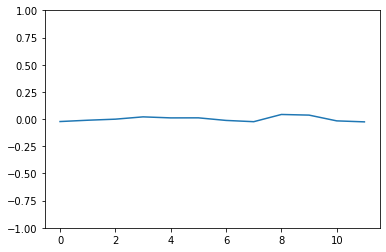

In [ ]:
#check whether the data is standardized or not
#mean should be 0
plt.ylim(-1,1)
means=[]
for i in range(X.shape[1]):
  means.append(np.mean(Xtest[:,i]))
plt.plot(means, scaley=False)

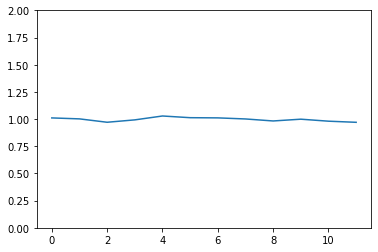

In [ ]:
#Check variance
plt.ylim(0,2)
vars=[]
for i in range(X.shape[1]):
  vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=model.predict(Xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(Xtest,Ytest)

0.8215

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,Ytest)

0.8215

Coefficient and Intercept

In [ ]:
model.coef_

array([[-0.03444651, -0.25435422,  0.75093096, -0.05445845,  0.20181171,
        -0.06473687, -0.04270295, -0.53682421,  0.03456902, -0.11088871,
        -0.08503169,  0.21209781]])

In [ ]:
model.intercept_

array([-1.63966082])

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
model.coef_.dot(Xtest[10,:])+model.intercept_

array([-2.2114584])

In [ ]:
sigmoid(model.coef_.dot(Xtest[10,:])+model.intercept_)

array([0.09872623])

In [ ]:
np.round(sigmoid(model.coef_.dot(Xtest[10,:])+model.intercept_))

array([0.])

In [ ]:
model.predict(Xtest[10,:].reshape(1,-1))

array([0])

### Feature selection using RFECV

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_)=="object":
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
encodings=onehotencoder.fit_transform(df_c["Geography"].values.reshape(-1,1)).toarray()

values=df_c["Geography"].unique()
for val in values:
  df_c["Geography_" +str(val)]=encodings[:,val]

df_c=df_c.drop(["Geography"],axis=1)
df_c.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [ ]:
X=df_c.drop(["Exited"],axis=1)
Y=df_c["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Xtrain=Scaler.fit_transform(Xtrain)
Xtest=Scaler.transform(Xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
model=LogisticRegression()
rfecv=RFECV(model,step=1,min_features_to_select=6,n_jobs=-1)
rfecv.fit(Xtrain,Ytrain)

RFECV(cv=None,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=6, n_jobs=-1, scoring=None, step=1, verbose=0)

In [ ]:
rfecv.support_

array([False,  True,  True, False,  True, False, False,  True, False,
        True, False,  True])

In [ ]:
rfecv.ranking_

array([7, 1, 1, 4, 1, 3, 5, 1, 6, 1, 2, 1])

In [ ]:
selected_features=np.where(rfecv.support_)[0]
Xtrain=Xtrain[:,selected_features]
Xtest=Xtest[:,selected_features]

In [ ]:
selected_features

array([ 1,  2,  4,  7,  9, 11])

In [ ]:
Xtrain

array([[ 0.9104886 , -0.84839766,  1.03777308, -1.03563452,  1.00451017,
        -0.5821616 ],
       [ 0.9104886 ,  0.67279499, -1.22714431, -1.03563452,  1.00451017,
        -0.5821616 ],
       [-1.0983114 , -0.37302496,  0.89852556, -1.03563452, -0.99551008,
         1.71773609],
       ...,
       [-1.0983114 , -0.4680995 ,  0.7654159 , -1.03563452,  1.00451017,
        -0.5821616 ],
       [ 0.9104886 ,  0.19742228, -1.22714431,  0.96559161,  1.00451017,
        -0.5821616 ],
       [-1.0983114 , -0.84839766,  0.88392027, -1.03563452, -0.99551008,
         1.71773609]])

In [ ]:
Xtest

array([[-1.0983114 , -0.27795042,  1.44555487,  0.96559161, -0.99551008,
         1.71773609],
       [ 0.9104886 ,  0.10234774, -1.22714431, -1.03563452, -0.99551008,
        -0.5821616 ],
       [ 0.9104886 , -0.75332312,  0.81790525,  0.96559161, -0.99551008,
         1.71773609],
       ...,
       [-1.0983114 ,  0.0072732 ,  0.45429259, -1.03563452,  1.00451017,
        -0.5821616 ],
       [-1.0983114 ,  1.14816769,  0.65829407,  0.96559161, -0.99551008,
         1.71773609],
       [-1.0983114 , -0.9434722 , -1.22714431, -1.03563452,  1.00451017,
        -0.5821616 ]])

In [ ]:
model.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(Xtest,Ytest)

0.824

In [ ]:
ypred=model.predict(Xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,Ytest)

0.824

### Hyperparmeter tuning using Grid Search

Hyperparmeter tuning: Searching for the best combinations of hyperparameters which lead to best result is called as hyperparameter tuning.
Grid Search: Grid Search simply builds a model for each possible combination of all the hyperparamater values provided. Then it evaluates each model based on their score and selects the architecture which produces the best result.

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_)=="object":
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
encodings=onehotencoder.fit_transform(df_c["Geography"].values.reshape(-1,1)).toarray()

values=df_c["Geography"].unique()
for val in values:
  df_c["Geography_" +str(val)]=encodings[:,val]

df_c=df_c.drop(["Geography"],axis=1)
df_c.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [ ]:
X=df_c.drop(["Exited"],axis=1)
Y=df_c["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Xtrain=Scaler.fit_transform(Xtrain)
Xtest=Scaler.transform(Xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
model=LogisticRegression()
rfecv=RFECV(model,step=1,min_features_to_select=6,n_jobs=-1)
rfecv.fit(Xtrain,Ytrain)

RFECV(cv=None,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=6, n_jobs=-1, scoring=None, step=1, verbose=0)

In [ ]:
selected_features=np.where(rfecv.support_)[0]
Xtrain=Xtrain[:,selected_features]
Xtest=Xtest[:,selected_features]

In [ ]:
param_grid={"penalty":['l2'],
            'C':[1.0,2.0,3.0],
            'max_iter':[100,200,300,500],
            'solver':["newton-cg","lbfgs","sag","saga"]}

model=LogisticRegression()
grid_search=GridSearchCV(model,param_grid)
grid_search.fit(Xtrain,Ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2.0, 3.0], 'max_iter': [100, 200, 300, 500],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
grid_search.score(Xtest,Ytest)

0.824

### K-folds Cross Validation

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_)=="object":
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
encodings=onehotencoder.fit_transform(df_c["Geography"].values.reshape(-1,1)).toarray()

values=df_c["Geography"].unique()
for val in values:
  df_c["Geography_" +str(val)]=encodings[:,val]

df_c=df_c.drop(["Geography"],axis=1)
df_c.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [ ]:
X=df_c.drop(["Exited"],axis=1)
Y=df_c["Exited"]

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
model=LogisticRegression()
rfecv=RFECV(model,step=1,min_features_to_select=6,n_jobs=-1)
rfecv.fit(X,Y)

RFECV(cv=None,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=6, n_jobs=-1, scoring=None, step=1, verbose=0)

In [ ]:
selected_features=np.where(rfecv.support_)[0]
X=X[:,selected_features]

In [ ]:
selected_features

array([ 1,  2,  4,  7,  9, 11])

In [ ]:
from sklearn.model_selection import KFold
k_fold=KFold(n_splits=5)
test_scores=[]
for train_idx,test_idx in k_fold.split(X):
  Xtrain=X[train_idx]
  Ytrain=Y[train_idx]

  Xtest=X[test_idx]
  Ytest=Y[test_idx]

  model=LogisticRegression()
  model.fit(Xtrain,Ytrain)

  test_scores.append(model.score(Xtest,Ytest))

Mean of test_scores: 0.8109999999999999


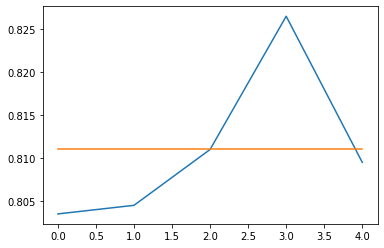

In [ ]:
print("Mean of test_scores:",np.mean(test_scores))
plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()

### Confusion Matrix

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_)=="object":
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
encodings=onehotencoder.fit_transform(df_c["Geography"].values.reshape(-1,1)).toarray()

values=df_c["Geography"].unique()
for val in values:
  df_c["Geography_" +str(val)]=encodings[:,val]

df_c=df_c.drop(["Geography"],axis=1)
df_c.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [ ]:
X=df_c.drop(["Exited"],axis=1)
Y=df_c["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Xtrain=Scaler.fit_transform(Xtrain)
Xtest=Scaler.transform(Xtest)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=model.predict(Xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(Xtest,Ytest)

0.8215

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,Ytest)

0.8215

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

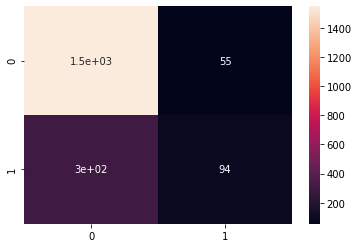

In [ ]:
matrix=confusion_matrix(Ytest,ypred)
sns.heatmap(matrix,annot=True)

In [ ]:
print("Accuracy score=",accuracy_score(Ytest,ypred))
print("Confusion Matrix=\n",confusion_matrix(Ytest,ypred))
print("Precision score=",precision_score(Ytest,ypred))
print("Recall score=",recall_score(Ytest,ypred))

Accuracy score= 0.8215
Confusion Matrix=
 [[1549   55]
 [ 302   94]]
Precision score= 0.6308724832214765
Recall score= 0.23737373737373738


Weighting Labels

In [ ]:
value_counts=dict(df_c["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [ ]:
for key,value in value_counts.items():
  value_counts[key]=value/len(df_c)
print(value_counts)

{0: 0.7963, 1: 0.2037}


In [ ]:
class_weights={}
for key,value in value_counts.items():
  class_weights[key] = sum(value_counts.values()) - value/sum(value_counts.values()) 
print(class_weights)

{0: 0.2037, 1: 0.7963}


In [ ]:
class_weights={0:20.37,1:79.63}

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight=class_weights)
model.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight={0: 20.37, 1: 79.63}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=model.predict(Xtest)
ypred

array([1, 0, 0, ..., 1, 1, 0])

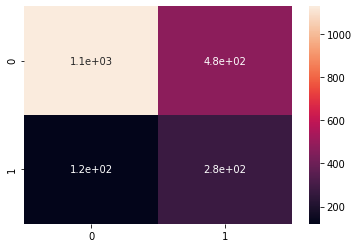

In [ ]:
matrix=confusion_matrix(Ytest,ypred)
sns.heatmap(matrix,annot=True)

In [ ]:
print("Accuracy score=",accuracy_score(Ytest,ypred))
print("Confusion Matrix=\n",confusion_matrix(Ytest,ypred))
print("Precision score=",precision_score(Ytest,ypred))
print("Recall score=",recall_score(Ytest,ypred))

Accuracy score= 0.702
Confusion Matrix=
 [[1128  476]
 [ 120  276]]
Precision score= 0.3670212765957447
Recall score= 0.696969696969697


### Using ROC-AUC score to analyze performance of Model

ROC(Receiver Operator Characteristic): It is a simple way to summarise all the information. On Y-axis their is True Positive rate(It tells the percentage of samples that are actually yes and we have predicted it yes.) and On X-axis there is False positive rate(It tells the percentage of samples that are actually no but we have predicted it yes.)
Steps for calculating ROC:
1. Start from a very low threshold i.e. 0.01.
2. Compute predictions and calculate the confusion matrix.
3. As we have the confusion matrix, calculate True Positive rate and False positive rate for visualization purpose.
4. So we do do it iteratively[1,2,3] by increasing threshold 0.01 till we reach the maximum threshold 0.99
5. Connect all the dots and we see a graph, This is called an ROC graph.

The ROC graph has summarize all the confusion matrices from each threshold.
Now we have drawn the graph, which will be best threshold?
The best threshold will be, the threshold with Highest True positive rate and Least False positive rate is the threshold we need to set our model.


AUC(Area Under the Curve): AUC is the Total Area that "ROC" graph has covered.
Comparison metric to select best model out of all models trained(AUC makes it easy to select the best model from the bunch of models that we have trained.)

Example: Suppose we have trained two logistic regression models with different hyper parameters and we are confused to select the best one out of both. So we can solve this problem:

a) plot the "ROC" for two models and calculate the "AUC" of each graph.

b) select the model that has higher "AUC" (because large AUC has higher True Positive rate compared to the lower one.)

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_)=="object":
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
encodings=onehotencoder.fit_transform(df_c["Geography"].values.reshape(-1,1)).toarray()

values=df_c["Geography"].unique()
for val in values:
  df_c["Geography_" +str(val)]=encodings[:,val]

df_c=df_c.drop(["Geography"],axis=1)
df_c.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [ ]:
X=df_c.drop(["Exited"],axis=1)
Y=df_c["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Xtrain=Scaler.fit_transform(Xtrain)
Xtest=Scaler.transform(Xtest)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=model.predict(Xtest)
pred_probs=model.predict_proba(Xtest)

In [ ]:
#sample Probalities. Each  prediction probability is of size 2 has we have 2 labels in our dataset i.e. 0 and 1.
#The index 0 represents the probability of predicting it as 0 and index 1 represents the probability of predicting it as 1.
pred_probs[:3]

array([[0.78851495, 0.21148505],
       [0.85005476, 0.14994524],
       [0.89806886, 0.10193114]])

In [ ]:
#Get the probs of Churn="1"
pred_probs=pred_probs[:,1]

In [ ]:
pred_probs

array([0.21148505, 0.14994524, 0.10193114, ..., 0.29535186, 0.34379591,
       0.12324027])

Metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,roc_curve,roc_auc_score

In [ ]:
print("Accuracy score=",accuracy_score(Ytest,ypred))
print("Confusion Matrix=\n",confusion_matrix(Ytest,ypred))
print("Precision score=",precision_score(Ytest,ypred))
print("Recall score=",recall_score(Ytest,ypred))

Accuracy score= 0.8215
Confusion Matrix=
 [[1549   55]
 [ 302   94]]
Precision score= 0.6308724832214765
Recall score= 0.23737373737373738


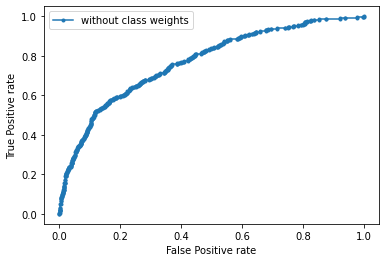

In [ ]:
#Fpr=False Positive rate , Tpr=True positive rate and "_" = Threshold is give by roc_curve
Fpr,Tpr,_ = roc_curve(Ytest,pred_probs)
plt.plot(Fpr,Tpr,marker=".",label="without class weights")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()

In [ ]:
Auc=roc_auc_score(Ytest,pred_probs)
print("Area under the curve: ",Auc)

Area under the curve:  0.770071349404267


Applying Class weights

In [ ]:
value_counts=dict(df_c["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [ ]:
for key,value in value_counts.items():
  value_counts[key]=value/len(df_c)
print(value_counts)

{0: 0.7963, 1: 0.2037}


In [ ]:
class_weights={}
for key,value in value_counts.items():
  class_weights[key] = sum(value_counts.values()) - value/sum(value_counts.values()) 
print(class_weights)

{0: 0.2037, 1: 0.7963}


In [ ]:
class_weights={0:20.37,1:79.63}

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight=class_weights)
model.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight={0: 20.37, 1: 79.63}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=model.predict(Xtest)
pred_probs=model.predict_proba(Xtest)

In [ ]:
pred_probs[:3]

array([[0.46447517, 0.53552483],
       [0.61763007, 0.38236993],
       [0.68369726, 0.31630274]])

In [ ]:
#Get the probs of Churn="1"
pred_probs=pred_probs[:,1]

In [ ]:
print("Accuracy score=",accuracy_score(Ytest,ypred))
print("Confusion Matrix=\n",confusion_matrix(Ytest,ypred))
print("Precision score=",precision_score(Ytest,ypred))
print("Recall score=",recall_score(Ytest,ypred))

Accuracy score= 0.702
Confusion Matrix=
 [[1128  476]
 [ 120  276]]
Precision score= 0.3670212765957447
Recall score= 0.696969696969697


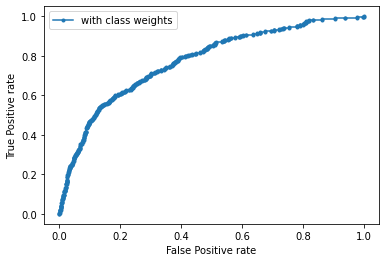

In [ ]:
#Fpr=False Positive rate , Tpr=True positive rate and "_" = Threshold is give by roc_curve
Fpr,Tpr,_ = roc_curve(Ytest,pred_probs)
plt.plot(Fpr,Tpr,marker=".",label="with class weights")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()

In [ ]:
Auc=roc_auc_score(Ytest,pred_probs)
print("Area under the curve: ",Auc)

Area under the curve:  0.7736104813723268


So from both the logistic model i.e.without class weight and with class weights the AUC of the with class weights model is best. So we select that model.

### Real Time Prediction

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
import pickle
def save_object(obj, name):
  pickle_obj=open(f"{name}.pck","wb")
  pickle.dump(obj, pickle_obj)
  pickle_obj.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_)=="object":
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])
    save_object(le,f"Label_Encoder_{name}")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
encodings=onehotencoder.fit_transform(df_c["Geography"].values.reshape(-1,1)).toarray()
save_object(onehotencoder,"OneHotEncoder_Geography")

values=df_c["Geography"].unique()
for val in values:
  df_c["Geography_" +str(val)]=encodings[:,val]

df_c=df_c.drop(["Geography"],axis=1)
df_c.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [ ]:
remaining_columns=list(df_c.columns)
remaining_columns.remove("Exited")

In [ ]:
save_object(remaining_columns,"columns")

In [ ]:
X=df_c[remaining_columns].values
Y=df_c["Exited"].values.astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Xtrain=Scaler.fit_transform(Xtrain)
Xtest=Scaler.transform(Xtest)
save_object(Scaler,"Scaler")

In [ ]:
value_counts=dict(df_c["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [ ]:
for key,value in value_counts.items():
  value_counts[key]=value/len(df_c)
print(value_counts)

{0: 0.7963, 1: 0.2037}


In [ ]:
class_weights={}
for key,value in value_counts.items():
  class_weights[key] = sum(value_counts.values()) - value/sum(value_counts.values()) 
print(class_weights)

{0: 0.2037, 1: 0.7963}


In [ ]:
class_weights={0:20.37,1:79.63}

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight=class_weights)
model.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight={0: 20.37, 1: 79.63}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=model.predict(Xtest)
save_object(model,"Mymodel")
pred_probs=model.predict_proba(Xtest)

In [ ]:
#Get the probs of Churn="1"
pred_probs=pred_probs[:,1]

In [ ]:
print("Accuracy score=",accuracy_score(Ytest,ypred))
print("Confusion Matrix=\n",confusion_matrix(Ytest,ypred))
print("Precision score=",precision_score(Ytest,ypred))
print("Recall score=",recall_score(Ytest,ypred))

Accuracy score= 0.702
Confusion Matrix=
 [[1128  476]
 [ 120  276]]
Precision score= 0.3670212765957447
Recall score= 0.696969696969697


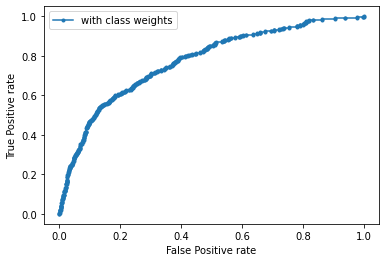

In [ ]:
#Fpr=False Positive rate , Tpr=True positive rate and "_" = Threshold is give by roc_curve
Fpr,Tpr,_ = roc_curve(Ytest,pred_probs)
plt.plot(Fpr,Tpr,marker=".",label="with class weights")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()

In [ ]:
Auc=roc_auc_score(Ytest,pred_probs)
print("Area under the curve: ",Auc)

Area under the curve:  0.7736104813723268


Real Time Prediction

In [ ]:
def load_object(name):
  pickle_obj=open(f"{name}.pck","rb")
  obj=pickle.load(pickle_obj)
  return obj

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
to_be_predicted=df_c.iloc[10,:].values

col_names=df_c.columns
predict_dict={}

for col_name,val in zip(col_names,to_be_predicted):
  predict_dict[col_name]=val

print(predict_dict)

{'RowNumber': 11, 'CustomerId': 15767821, 'Surname': 'Bearce', 'CreditScore': 528, 'Geography': 'France', 'Gender': 'Male', 'Age': 31, 'Tenure': 6, 'Balance': 102016.72, 'NumOfProducts': 2, 'HasCrCard': 0, 'IsActiveMember': 0, 'EstimatedSalary': 80181.12, 'Exited': 0}


In [ ]:
del predict_dict['RowNumber']
del predict_dict['CustomerId']
del predict_dict['Surname']

In [ ]:
predict_dict

{'Age': 31,
 'Balance': 102016.72,
 'CreditScore': 528,
 'EstimatedSalary': 80181.12,
 'Exited': 0,
 'Gender': 'Male',
 'Geography': 'France',
 'HasCrCard': 0,
 'IsActiveMember': 0,
 'NumOfProducts': 2,
 'Tenure': 6}

In [ ]:
real_output=predict_dict['Exited']
del predict_dict['Exited']

In [ ]:
predict_dict['Gender']=load_object('Label_Encoder_Gender').transform(np.array(predict_dict['Gender']).reshape(-1,))[0]

In [ ]:
predict_dict['Geography']=load_object('Label_Encoder_Geography').transform(np.array(predict_dict['Geography']).reshape(-1,))[0]

In [ ]:
predict_dict

{'Age': 31,
 'Balance': 102016.72,
 'CreditScore': 528,
 'EstimatedSalary': 80181.12,
 'Gender': 1,
 'Geography': 0,
 'HasCrCard': 0,
 'IsActiveMember': 0,
 'NumOfProducts': 2,
 'Tenure': 6}

In [ ]:
predict_dict['Geography_ohe']=load_object('OneHotEncoder_Geography').transform(np.array(predict_dict['Geography']).reshape(-1,1)).toarray()[0]

In [ ]:
predict_dict

{'Age': 31,
 'Balance': 102016.72,
 'CreditScore': 528,
 'EstimatedSalary': 80181.12,
 'Gender': 1,
 'Geography': 0,
 'Geography_ohe': array([1., 0., 0.]),
 'HasCrCard': 0,
 'IsActiveMember': 0,
 'NumOfProducts': 2,
 'Tenure': 6}

In [ ]:
del predict_dict['Geography']

In [ ]:
for e,i in enumerate(predict_dict['Geography_ohe']):
  predict_dict['Geography_' +str(e)] = i

In [ ]:
del predict_dict['Geography_ohe']

In [ ]:
predict_dict

{'Age': 31,
 'Balance': 102016.72,
 'CreditScore': 528,
 'EstimatedSalary': 80181.12,
 'Gender': 1,
 'Geography_0': 1.0,
 'Geography_1': 0.0,
 'Geography_2': 0.0,
 'HasCrCard': 0,
 'IsActiveMember': 0,
 'NumOfProducts': 2,
 'Tenure': 6}

In [ ]:
col_sequence=load_object("columns")
array=[]

for col_name in col_sequence:
  array.append(predict_dict[col_name])

array=np.array(array)
print(array)

[5.2800000e+02 1.0000000e+00 3.1000000e+01 6.0000000e+00 1.0201672e+05
 2.0000000e+00 0.0000000e+00 0.0000000e+00 8.0181120e+04 1.0000000e+00
 0.0000000e+00 0.0000000e+00]


In [ ]:
array=load_object('Scaler').transform(array.reshape(1,-1))

In [ ]:
prediction=load_object('Mymodel').predict(array)[0]
print(prediction)

0


In [ ]:
print("Original:",real_output,"\nPredicted:",prediction)

Original: 0 
Predicted: 0
